In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 1) Merging the CSVs

In [33]:
path = "./Input"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

yr_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    yr_data = pd.concat([yr_data, current_data])
    
yr_data.to_csv("year_copy.csv", index=False) 
# Index=False is necessary to avoid the index colunm in the data frame becoming
#a new column in our new CSV

#### Show the data in yr_data

In [34]:
yr_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# 2)Cleaning the data

In [35]:
empty= yr_data[yr_data.isna().any(axis=1)]
empty.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


### Remove rows with NaNs in all columns

In [36]:
yr_data=yr_data.dropna(how = 'all')
yr_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Check the dtatypes of all columns and then change them working types

In [37]:
yr_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### Convert "Quantity Ordered" and "Price Each" to int and float respectively

In [38]:
missing_value=yr_data.iloc[517] 
missing_value
#The row at this index (and similar ones)
#has to be dropped before the conversion as it raises an exception

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 519, dtype: object

In [39]:
yr_data = yr_data[yr_data['Order Date'].str[0:2]!='Or']

In [40]:
yr_data[["Quantity Ordered", "Price Each"]] = yr_data[["Quantity Ordered", "Price Each"]]\
.apply(pd.to_numeric)

In [41]:
yr_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### Task 1 : Group Total Sales by Month and plot it

Create a Sales column \
Sales= Price X Qty

In [42]:
yr_data['Sales']= yr_data['Quantity Ordered']*yr_data['Price Each']
yr_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


Create a Month column \
Month value will be gotten from [0:2] of "Order Date" \
Then change from 'string' to 'numeric' type.

In [43]:
yr_data['Month']=yr_data['Order Date'].str[0:2]
yr_data['Month']=yr_data['Month'].astype('int32')
yr_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


In [44]:
grouped= yr_data.groupby(['Month']).sum()
grouped

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


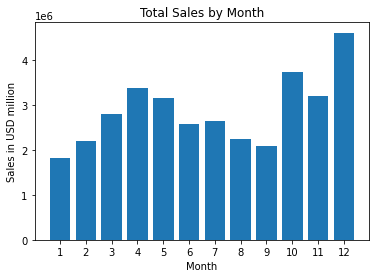

In [45]:
months = range(1,13)
sales= yr_data.groupby(['Month']).sum()['Sales']
plt.bar(months,sales)
plt.xticks(months)
plt.title('Total Sales by Month')
plt.ylabel('Sales in USD million')
plt.xlabel('Month')
plt.show()


## Task 2: What city has the highest Sales?

Get City and State from "Purchase Address" and put it in "City" column 

In [46]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

yr_data['City'] = yr_data['Purchase Address'].apply\
(lambda x: f"{get_city(x)}  ({get_state(x)})")
yr_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)


Group cities by total sales then plot them.

In [47]:
 yr_data.groupby(['City']).sum()['Sales']

City
Atlanta  (GA)          2.795499e+06
Austin  (TX)           1.819582e+06
Boston  (MA)           3.661642e+06
Dallas  (TX)           2.767975e+06
Los Angeles  (CA)      5.452571e+06
New York City  (NY)    4.664317e+06
Portland  (ME)         4.497583e+05
Portland  (OR)         1.870732e+06
San Francisco  (CA)    8.262204e+06
Seattle  (WA)          2.747755e+06
Name: Sales, dtype: float64

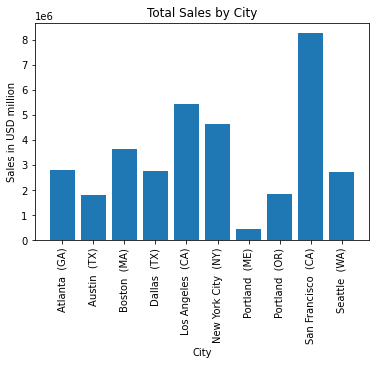

In [48]:
cities= [city for city, df in yr_data.groupby(['City'])]
sales= yr_data.groupby(['City']).sum()['Sales']
plt.bar(cities,sales)
plt.xticks(cities,rotation=90)
plt.title('Total Sales by City')
plt.ylabel('Sales in USD million')
plt.xlabel('City')
plt.show()

## Task 3: What time should we hire more staff?
 Time periods with highest quantity of items ordered.

#### Use DateTime library to get time by hour

In [49]:
yr_data['Order Date'].dtype

dtype('O')

In [50]:
import datetime

yr_data['Order Date'] = pd.to_datetime(yr_data['Order Date'])
yr_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)


In [57]:
yr_data['Hour']= pd.to_datetime(yr_data['Order Date']).dt.hour
yr_data['Count'] = 1
yr_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX),8,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA),22,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA),14,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),14,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),9,1


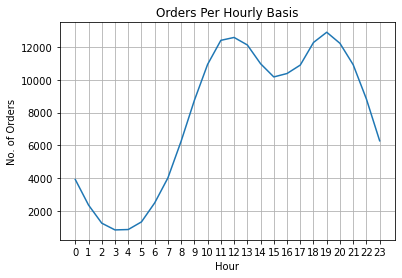

In [63]:
keys = [pair for pair, df in yr_data.groupby(['Hour'])]
yaxis= yr_data.groupby(['Hour']).count()['Count']
plt.plot(keys,yaxis)
plt.xticks(keys)
plt.title('Orders Per Hourly Basis')
plt.ylabel('No. of Orders')
plt.xlabel('Hour')
plt.grid()
plt.show()